In [2]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scipy
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\nmagr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\nmagr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\nmagr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\nmagr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\nmagr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\nmagr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

Text(0.5, 1.0, 'Owner-occupied homes')

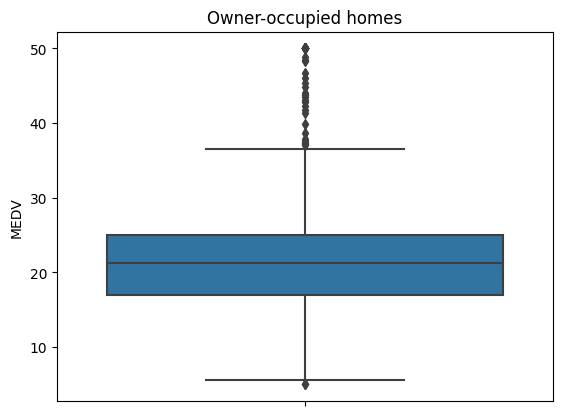

In [5]:
med = sns.boxplot(y = 'MEDV',data = boston_df)
med.set_title('Owner-occupied homes')
#plt.show()

The above boxplot shows the median value for MEDV

Text(0.5, 1.0, 'Homes near Charles River')

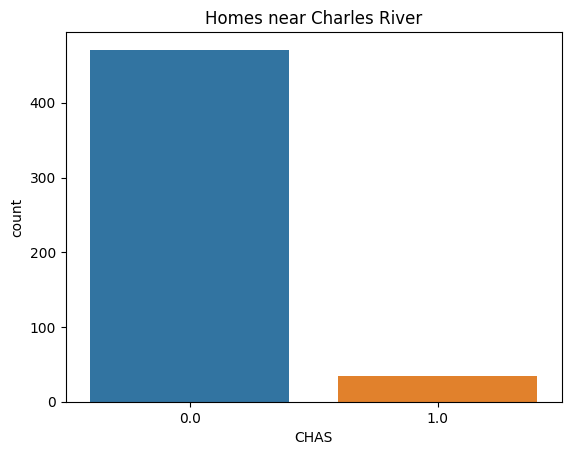

In [6]:
#sns.set(style = 'whitegrid')
cr = sns.countplot(x = 'CHAS', data = boston_df)
cr.set_title('Homes near Charles River')

The above graph shows that most houses aren't near the river

Text(0.5, 1.0, 'Median value of owner-occupied homes by Age Group')

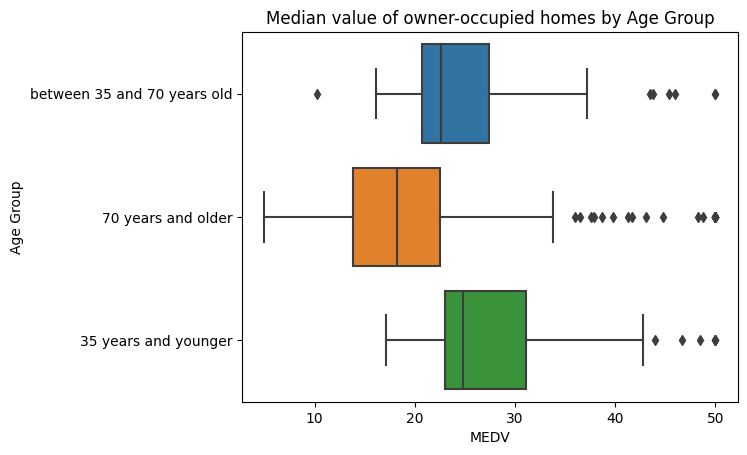

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age Group'] = 'between 35 and 70 years old'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age Group'] = '70 years and older'

med_age = sns.boxplot(x = 'MEDV', y = 'Age Group', data = boston_df)
med_age.set_title('Median value of owner-occupied homes by Age Group')

The above boxplot shows that the median value of homes is higher for the lower age groups

Text(0.5, 1.0, 'Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town')

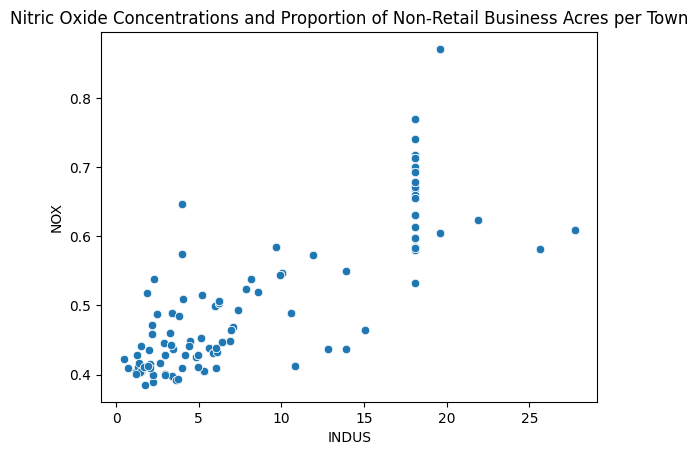

In [8]:
nitric_acres = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
nitric_acres.set_title('Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town')

From the graph above, it can be understood that a higher proportion of non-retail business per town leads to a higher concentration of Nitric oxide

Text(0.5, 1.0, 'Pupil to teacher ratio per town')

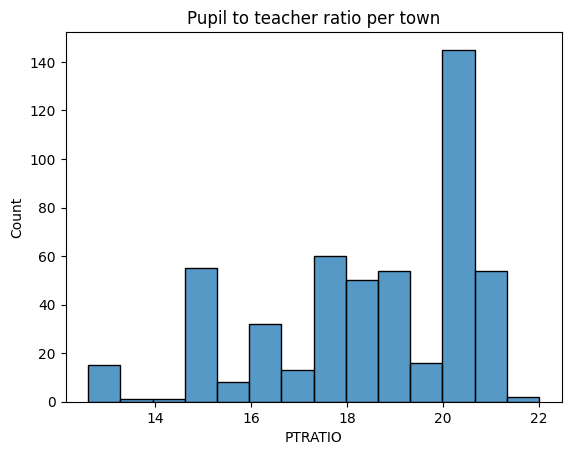

In [9]:
pupil_teacher = sns.histplot(x = 'PTRATIO', data = boston_df)
pupil_teacher.set_title('Pupil to teacher ratio per town')

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**
* Null Hypothesis: no significant difference in median values between houses bounded by the river and houses not bounded
* Alternative Hypothesis: there is a significant difference in the median values

In [10]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age Group,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years old,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years old,FAR
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years old,FAR
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years old,FAR


In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since the p-value is less than .05, we reject the Null Hypothesis. This means that there isn't a difference in median value between houses bounded by the Charles River and houses not bounded

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**
* Null Hypothesis: there isn't a statistical difference in median values of houses (MEDV) for each proportion of units built before 1940
* Alternative Hypothesis: there is a statistical difference in the values

In [12]:
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Since the p-value is less than .05, we reject the Null Hypothesis, meaning that there is a difference in median values of houses for each proportion built before 1940

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**
* Null Hypothesis: Nitric oxide concentration not correlated with proportion of non-retail business acres per town
* Alternative Hypothesis: Nitric oxide concentration is correlated with the proportion

In [14]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

Since the Pearson Coefficient is .76365 and the p-value is less than .05, we reject the Null Hypothesis; thus we conclude there is a correlation

**What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**
* Null Hypothesis: There is no impact
* Alternative Hypothesis: There is an impact

In [15]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

impact = sm.OLS(y,x).fit()
predict = impact.predict(x)

impact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        00:25:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value is less than .05, the null hypothesis is rejected